In [1]:
from lineage.BaumWelch import fit
from lineage.DownwardRecursion import get_root_gammas, get_nonroot_gammas
from lineage.Viterbi import get_leaf_deltas, get_nonleaf_deltas, Viterbi
from lineage.UpwardRecursion import get_leaf_Normalizing_Factors, get_leaf_betas, get_nonleaf_NF_and_betas
from lineage.tHMM import tHMM
from lineage.tHMM_utils import max_gen, get_gen, get_parents_for_level, getAccuracy, getAIC
from lineage.Lineage_utils import get_numLineages, init_Population, remove_singleton_lineages, remove_unfinished_cells
from lineage.Lineage_utils import generatePopulationWithTime as gpt
from lineage.plotting_utils import make_colormap_graph
from lineage.CellNode import CellNode
from lineage.Analyze import Analyze

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [16]:
'''Generates a lineage with depth model ie one new cell state lineage is added to another state homogeneous lineage'''

import numpy as np

from lineage.Lineage_utils import remove_singleton_lineages, remove_unfinished_cells
from lineage.Lineage_utils import generatePopulationWithTime as gpt


def Depth_Two_State_Lineage(T_MAS, MASinitCells, MASlocBern, T_2, initCells2, locBern2, FOM='E', betaExp=None, betaExp2=None):
    '''X is the complete lineage with removed singletons. newLineage is X wihtout the removed singletons. Master Lineage and sublineage2 are the lineages corresponding to state1 and state2'''
    'Shakthis lineage where a second state is appended to first'
    # Making the first lineage
    MASexperimentTime = T_MAS
    masterLineage = gpt(MASexperimentTime, MASinitCells, MASlocBern, FOM=FOM, betaExp=betaExp)
    masterLineage = remove_unfinished_cells(masterLineage)
    masterLineage = remove_singleton_lineages(masterLineage)
    while not masterLineage:
        masterLineage = gpt(MASexperimentTime, MASinitCells, MASlocBern, FOM=FOM, betaExp=betaExp)
        masterLineage = remove_unfinished_cells(masterLineage)
        masterLineage = remove_singleton_lineages(masterLineage)
    for cell in masterLineage:
        cell.true_state = 0
    # Making the second lineage
    experimentTime2 = T_2
    sublineage2 = gpt(experimentTime2, initCells2, locBern2, FOM=FOM, betaExp=betaExp2)
    sublineage2 = remove_unfinished_cells(sublineage2)
    sublineage2 = remove_singleton_lineages(sublineage2)
    while not sublineage2:
        sublineage2 = gpt(experimentTime2, initCells2, locBern2, FOM=FOM, betaExp=betaExp2)
        sublineage2 = remove_unfinished_cells(sublineage2)
        sublineage2 = remove_singleton_lineages(sublineage2)
    cell_endT_holder = []
    for cell in masterLineage:
        cell_endT_holder.append(cell.endT)

    master_cell_endT = max(cell_endT_holder)  # get the longest tau in the list
    master_cell_endT_idx = np.argmax(cell_endT_holder)  # get the idx of the longest tau in the lineage
    master_cell = masterLineage[master_cell_endT_idx]  # get the master cell via the longest tau index

    for cell in sublineage2:
        cell.true_state = 1
        cell.linID = master_cell.linID
        cell.gen += master_cell.gen
        cell.startT += master_cell_endT
        cell.endT += master_cell_endT
    master_cell.left = sublineage2[0]
    sublineage2[0].parent = master_cell
    newLineage = masterLineage + sublineage2

    X = remove_unfinished_cells(newLineage)
    X = remove_singleton_lineages(newLineage)
    return(X, newLineage, masterLineage, sublineage2)


In [26]:
T_MAS=400
T_2=150
MASinitCells=[1]
MASlocBern=[0.999]
MASbeta=[80]
initCells2=[1]
locBern2=[0.8]
beta2=[20]
numStates=2
max_lin_length=300
min_lin_length=5
FOM='E'
X, newLineage, masterLineage, subLineage2 = Depth_Two_State_Lineage(T_MAS, MASinitCells, MASlocBern, T_2, initCells2, locBern2, FOM=FOM, betaExp=MASbeta, betaExp2=beta2)
X = remove_unfinished_cells(X)
X = remove_singleton_lineages(X)
_, _, all_states, tHMMobj, _, _ = Analyze(X, numStates)



Lineage Index: 0
Initial Proabablities: 
[1.00000e+000 1.66965e-318]
Transition State Matrix: 
[[9.16627132e-01 8.33728678e-02]
 [2.48653373e-13 1.00000000e+00]]
Emission Parameters: 
[[ 1.         50.60227231]
 [ 0.72       13.75920016]]
True states: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
Viterbi estimated raw states (before state assignment switch): 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
State assignment after analysis: 
(0, 1)
Viterbi estimated relative states (after state switch): 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1

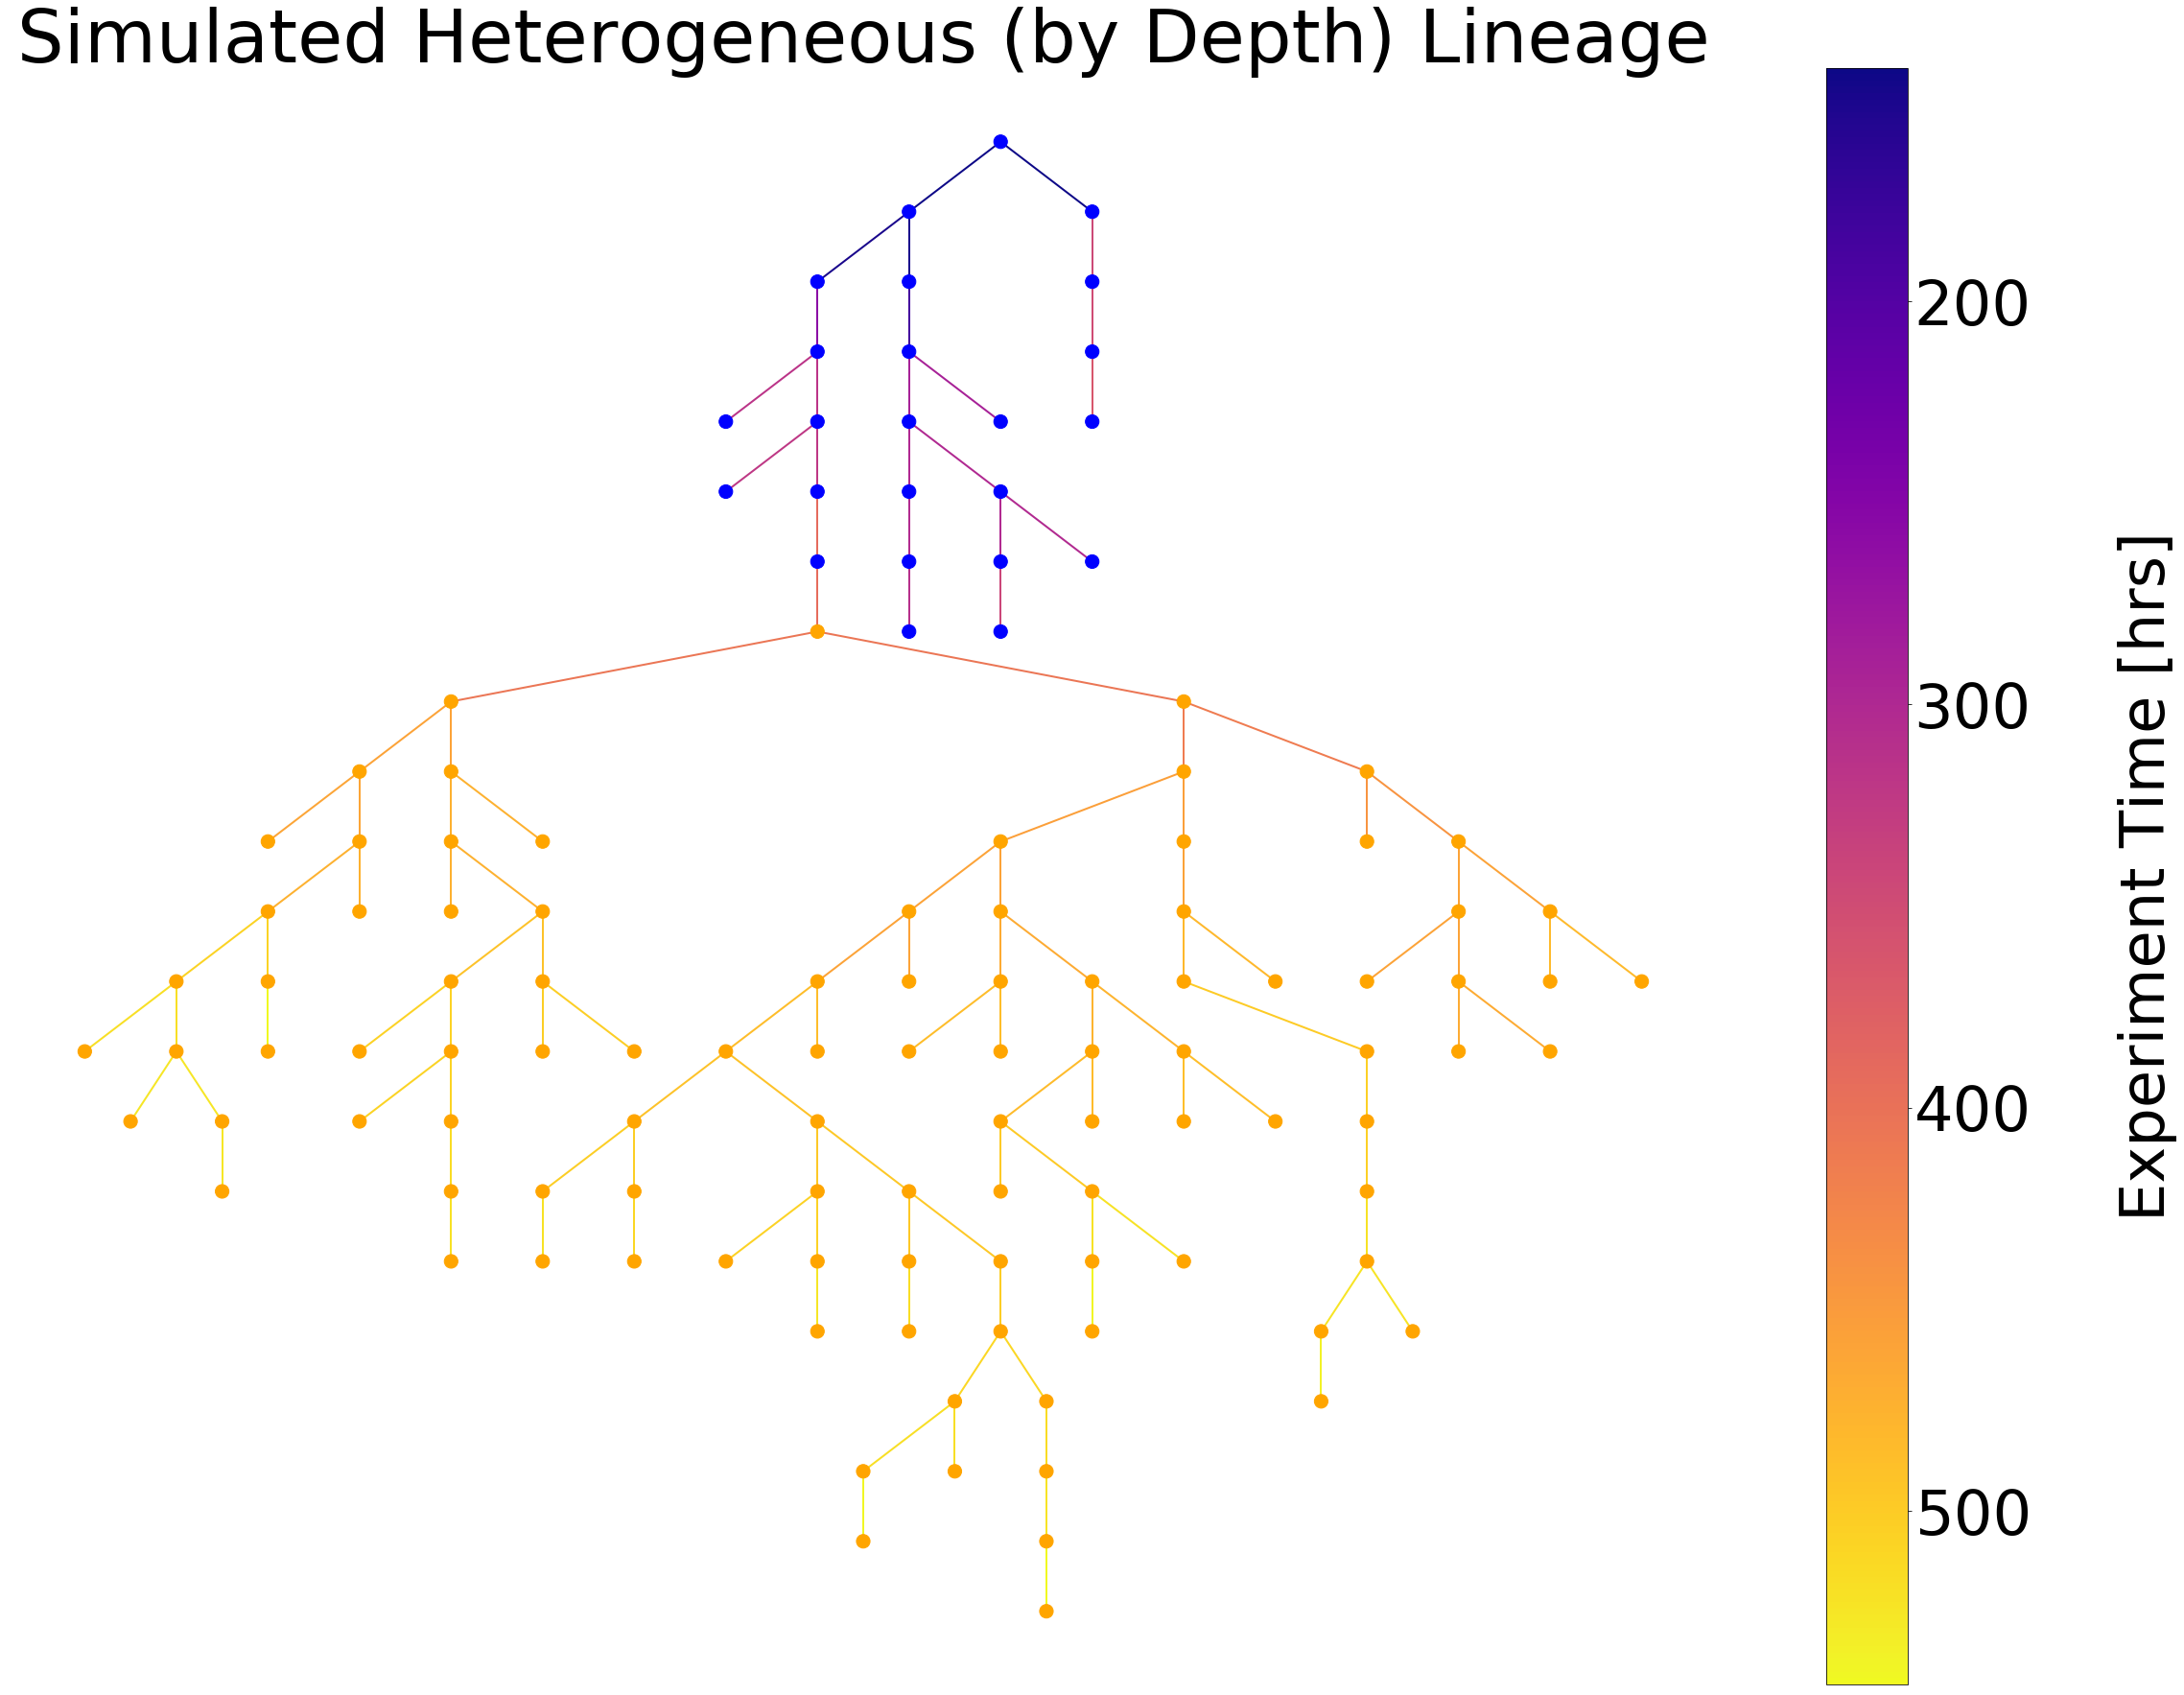

In [27]:
getAccuracy(tHMMobj, all_states, verbose=True)
import matplotlib as mpl
from matplotlib import ticker


G, cmap, _ = make_colormap_graph(X)
M = G.number_of_edges()
edge_weights = [d for (u,v,d) in G.edges.data('weight')]
#pos prog options: neato, dot, twopi, circo (don't use), fdp (don't use), nop (don't use), wc (don't use), acyclic (don't use), gvpr (don't use), gvcolor (don't use), ccomps (don't use), sccmap (don't use), tred (don't use), sfdp (don't use), unflatten (don't use)
pos = graphviz_layout(G, prog='dot', root=0)
plt.figure(figsize=(40,31))
plt.figaspect(1)
node_size = 200
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=cmap, alpha=1)
edges = nx.draw_networkx_edges(G, pos, node_size=node_size, edge_color=edge_weights, edge_cmap=plt.cm.plasma, width=2)

ax = plt.gca()
ax.set_axis_off()
cb = plt.colorbar(edges, ticks=edge_weights)
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label(label=r'Experiment Time [hrs]', labelpad=90)
cb.ax.invert_yaxis()
plt.title('Simulated Heterogeneous (by Depth) Lineage')
plt.rcParams.update({'font.size': 64})
plt.savefig('true.svg')
plt.show()

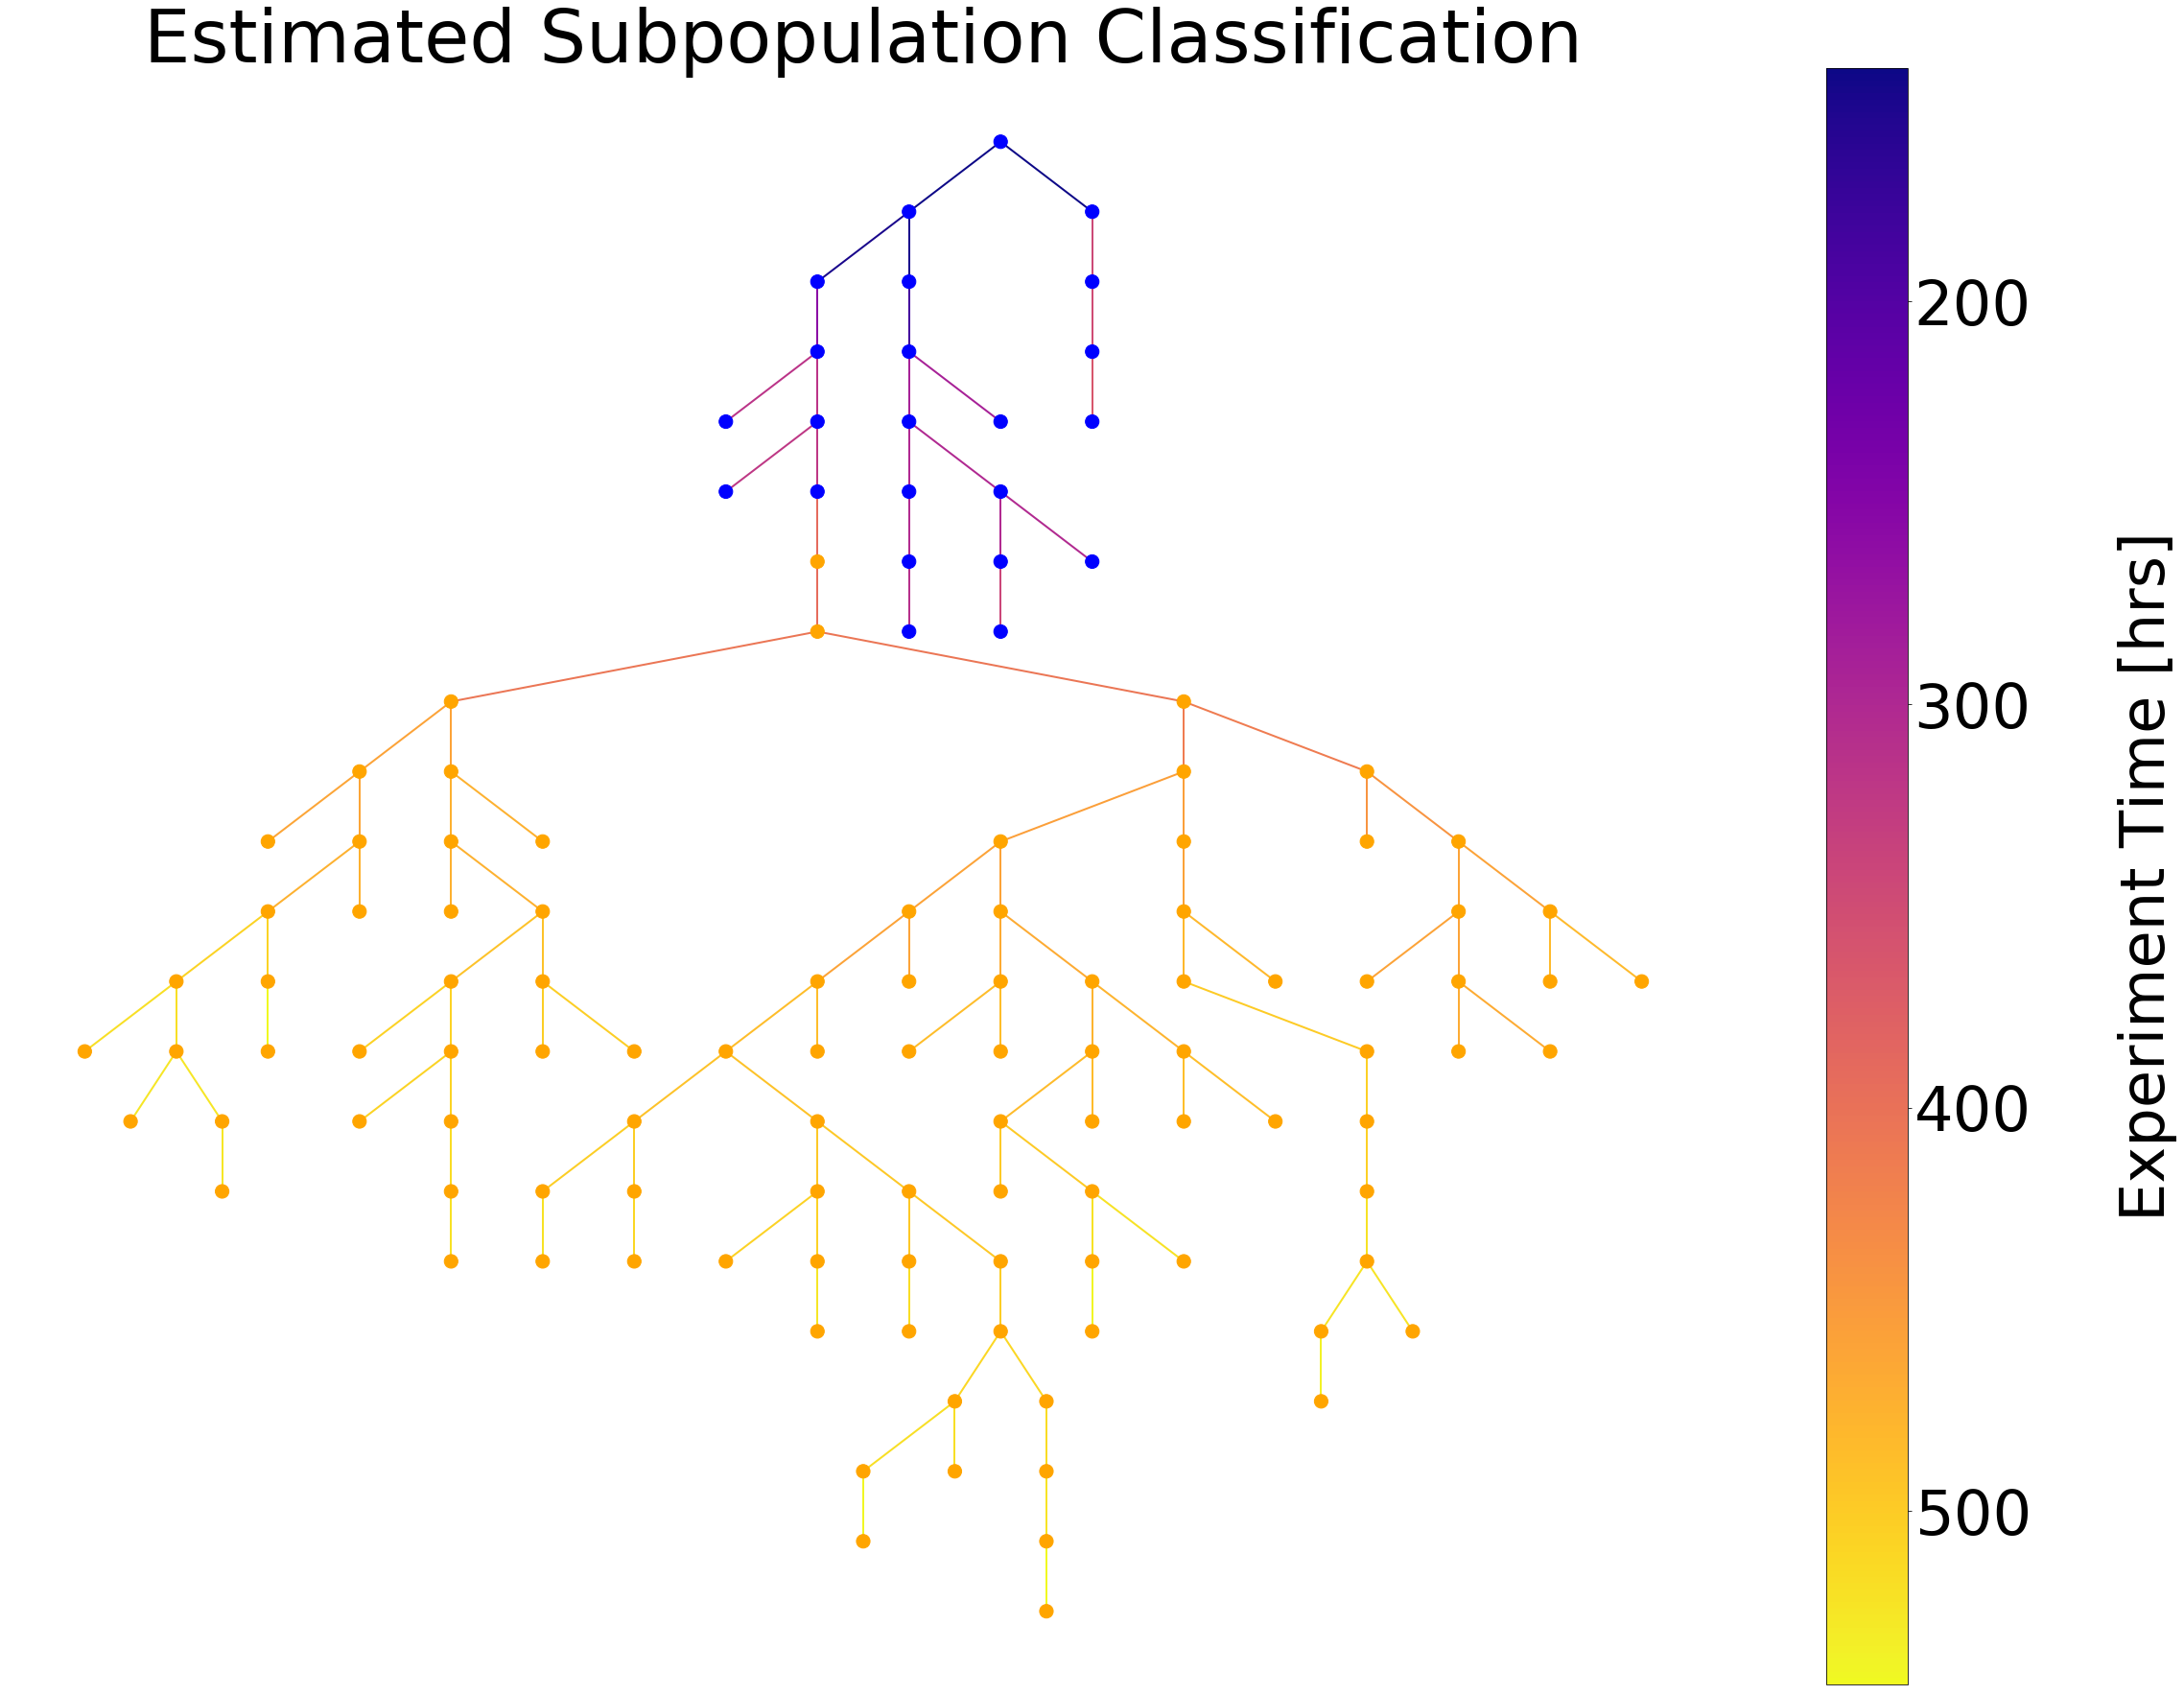

In [28]:
G, cmap, _ = make_colormap_graph(X, tHMMobj.states[0])
M = G.number_of_edges()
edge_weights = [d for (u,v,d) in G.edges.data('weight')]
#pos prog options: neato, dot, twopi, circo (don't use), fdp (don't use), nop (don't use), wc (don't use), acyclic (don't use), gvpr (don't use), gvcolor (don't use), ccomps (don't use), sccmap (don't use), tred (don't use), sfdp (don't use), unflatten (don't use)
pos = graphviz_layout(G, prog='dot', root=0)
plt.figure(figsize=(40,31))
plt.figaspect(1)
node_size = 200
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=cmap, alpha=1)
edges = nx.draw_networkx_edges(G, pos, node_size=node_size, edge_color=edge_weights, edge_cmap=plt.cm.plasma, width=2)

ax = plt.gca()
ax.set_axis_off()
cb = plt.colorbar(edges, ticks=edge_weights)
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()
cb.set_label(label=r'Experiment Time [hrs]', labelpad=90)
cb.ax.invert_yaxis()
plt.title('Estimated Subpopulation Classification')
plt.rcParams.update({'font.size': 64})
plt.savefig('estimated.svg')
plt.show()

In [32]:
numStates = 2

MASexperimentTime = 200
MASinitCells = [1]
MASlocBern = [0.99999999999]
MAScGom = [1]
MASscaleGom = [75]
masterLineage = gpt(MASexperimentTime, MASinitCells, MASlocBern, MAScGom, MASscaleGom)
masterLineage = remove_NaNs(masterLineage)
while len(masterLineage) <= 0:
    masterLineage = gpt(MASexperimentTime, MASinitCells, MASlocBern, MAScGom, MASscaleGom)
    masterLineage = remove_NaNs(masterLineage)
print(len(masterLineage))
for cell in masterLineage:
    cell.true_state = 0
experimentTime2 = 150
initCells2 = [1]
locBern2 = [0.7]
cGom2 = [2]
scaleGom2 = [50]
sublineage2 = gpt(experimentTime2, initCells2, locBern2, cGom2, scaleGom2)
sublineage2 = remove_NaNs(sublineage2)
while len(sublineage2) <= 0:
    sublineage2 = gpt(experimentTime2, initCells2, locBern2, cGom2, scaleGom2)
    sublineage2 = remove_NaNs(sublineage2)
print(len(sublineage2))

cell_startT_holder = []
for cell in masterLineage:
    cell_startT_holder.append(cell.startT)

master_cell_startT_idx = np.argmax(cell_startT_holder) # get the idx of the longest tau in the lineage
master_cell = masterLineage[master_cell_startT_idx] # get the master cell via the longest tau index

for cell in sublineage2:
    cell.true_state = 1
    cell.linID = master_cell.linID
    cell.gen += master_cell.gen
    cell.startT += master_cell.endT
    cell.endT += master_cell.endT

master_cell.left = sublineage2[0]
sublineage2[0].parent = master_cell
newLineage = masterLineage + sublineage2
newLineage = remove_NaNs(newLineage)
print(len(newLineage))

Y = remove_NaNs(newLineage)
tHMMobjY = tHMM(Y, numStates=numStates, FOM='G') # build the tHMM class with X
fit(tHMMobjY, max_iter=500, verbose=False)

deltasY, state_ptrsY = get_leaf_deltas(tHMMobjY) # gets the deltas matrix
get_nonleaf_deltas(tHMMobjY, deltasY, state_ptrsY)
all_statesY = Viterbi(tHMMobjY, deltasY, state_ptrsY)
getAccuracy(tHMMobjY, all_statesY, verbose=True)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
import matplotlib as mpl

G, cmap, _ = make_colormap_graph(Y)
M = G.number_of_edges()
edge_weights = [d for (u,v,d) in G.edges.data('weight')]
#pos prog options: neato, dot, twopi, circo (don't use), fdp (don't use), nop (don't use), wc (don't use), acyclic (don't use), gvpr (don't use), gvcolor (don't use), ccomps (don't use), sccmap (don't use), tred (don't use), sfdp (don't use), unflatten (don't use)
pos = graphviz_layout(G, prog='twopi', root=0)
plt.figure(figsize=(35,31))
plt.figaspect(1)
node_size = 100
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=cmap, alpha=1)
edges = nx.draw_networkx_edges(G, pos, node_size=node_size, edge_color=edge_weights, edge_cmap=plt.cm.inferno_r, width=2)

ax = plt.gca()
ax.set_axis_off()
cb = plt.colorbar(edges)
cb.set_label(label=r'Experiment Time [hrs]', labelpad=15)
plt.title('Simulated Heterogeneous (by Depth) Lineage')
plt.rcParams.update({'font.size': 64})
plt.show()

In [ ]:
asdass = [not i for i in all_states[0]]
G, cmap, _ = make_colormap_graph(Y, all_statesY[0])
M = G.number_of_edges()
edge_weights = [d for (u,v,d) in G.edges.data('weight')]
#pos prog options: neato, dot, twopi, circo (don't use), fdp (don't use), nop (don't use), wc (don't use), acyclic (don't use), gvpr (don't use), gvcolor (don't use), ccomps (don't use), sccmap (don't use), tred (don't use), sfdp (don't use), unflatten (don't use)
pos = graphviz_layout(G, prog='twopi', root=0)
plt.figure(figsize=(35,31))
plt.figaspect(1)
node_size = 100
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=cmap, alpha=1)
edges = nx.draw_networkx_edges(G, pos, node_size=node_size, edge_color=edge_weights, edge_cmap=plt.cm.inferno_r, width=2)

ax = plt.gca()
ax.set_axis_off()
cb = plt.colorbar(edges)
cb.set_label(label=r'Experiment Time [hrs]', labelpad=15)
plt.title('Estimated Fit (Depth)')
plt.rcParams.update({'font.size': 64})
plt.show()

In [ ]:
experimentTime = 250
initCells = [1]
locBern = [0.99999999999]
cGom = [1]
scaleGom = [75]

LINEAGE = gpt(experimentTime, initCells, locBern, cGom, scaleGom, FOM='G')

while len(LINEAGE) <= 10:
    LINEAGE = gpt(experimentTime, initCells, locBern, cGom, scaleGom, FOM='G')

X = LINEAGE
X = remove_NaNs(X)
yval = []
x1val = []
x2val = []
for numState in range(4):
    print(numState+1)
    tHMMobj = tHMM(X, numStates=numState+1, FOM='G') # build the tHMM class with X
    tHMMobj, NF, betas, gammas, LL = fit(tHMMobj, max_iter=100, verbose=False)
    AIC_value, numStates, deg = getAIC(tHMMobj, LL)
    yval.append(AIC_value[0])
    x1val.append(numStates[0])
    x2val.append(deg[0])

    
switchT = 200
experimentTime = switchT + 150
initCells = [1]
locBern = [0.99999999999]
cGom = [1]
scaleGom = [75]
bern2 = [0.6]
cG2 = [2]
scaleG2 = [50]

LINEAGE = gpt(experimentTime, initCells, locBern, cGom, scaleGom, switchT, bern2, cG2, scaleG2, FOM='G')
while len(LINEAGE) <= 0:
    LINEAGE = gpt(experimentTime, initCells, locBern, cGom, scaleGom, switchT, bern2, cG2, scaleG2, FOM='G')
    
X = LINEAGE
X = remove_NaNs(X)
yval2 = []
x1val2 = []
x2val2 = []
for numState in range(3):
    print(numState+2)
    tHMMobj = tHMM(X, numStates=numState+2, FOM='G') # build the tHMM class with X
    tHMMobj, NF, betas, gammas, LL = fit(tHMMobj, max_iter=100, verbose=False)
    AIC_value, numStates, deg = getAIC(tHMMobj, LL)
    yval2.append(AIC_value[0])
    x1val2.append(numStates[0])
    x2val2.append(deg[0])

In [ ]:
print(yval)
yvalnp = np.array(yval)
print(yvalnp)
yvalnp0 = yvalnp-min(yvalnp)
print(yvalnp0)


from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x1val, yvalnp0, marker='*', c='b', s=500, label='One state data/model')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.grid(True, linestyle='--')
ax1.set_xlabel('Number of States')
ax1.set_ylabel('AIC Cost')
title = ax1.set_title('Akaike Information Criterion')
title.set_y(1.1)
fig.subplots_adjust(top=1.3)

ax2 = ax1.twiny()
ax2.set_xticks([1]+ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(x2val)
ax2.set_xlabel('Number of parameters')

ax1.legend()
plt.rcParams.update({'font.size': 28})
plt.show()

In [ ]:
print(yval2)
yvalnp2 = np.array(yval2)
print(yvalnp2)
yvalnp02 = yvalnp2-min(yvalnp2)
print(yvalnp02)


from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x1val2, yvalnp02, marker='*', c='r', s=500, label='Two state data/model')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.grid(True, linestyle='--')
ax1.set_xlabel('Number of States')
ax1.set_ylabel('AIC Cost')
title = ax1.set_title('Akaike Information Criterion')
title.set_y(1.1)
fig.subplots_adjust(top=1.3)

ax2 = ax1.twiny()
ax2.set_xticks([1]+ax1.get_xticks())
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(x2val2)
ax2.set_xlabel('Number of parameters')

ax1.legend()
plt.rcParams.update({'font.size': 28})
plt.show()